In [1]:
library(tidyverse)
library(nycflights13)
library(Lahman)
library(maps)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘maps’ was built under R version 4.2.3”

Attachi

## [19.2.4 Exercises](https://r4ds.hadley.nz/joins#exercises)

1. We forgot to draw the relationship between weather and airports in Figure 19.1. What is the relationship and how should it appear in the diagram?

weather$origin should point to airports$faa in the diagram.

2. weather only contains information for the three origin airports in NYC. If it contained weather records for all airports in the USA, what additional connection would it make to flights?

flights$dest

3. The year, month, day, hour, and origin variables almost form a compound key for weather, but there’s one hour that has duplicate observations. Can you figure out what’s special about that hour?

In [7]:
weather |> 
  count(year, month, day, hour, origin) |> 
  filter(n > 1)

year,month,day,hour,origin,n
<int>,<int>,<int>,<int>,<chr>,<int>
2013,11,3,1,EWR,2
2013,11,3,1,JFK,2
2013,11,3,1,LGA,2


It's the first hour, so it could be due to delayed flights from the previous day.

4. We know that some days of the year are special and fewer people than usual fly on them (e.g., Christmas eve and Christmas day). How might you represent that data as a data frame? What would be the primary key? How would it connect to the existing data frames?

I would have columns for month, day, and event. The primary key would be a combination of month and day and would connect to the filght month and day.

5. Draw a diagram illustrating the connections between the Batting, People, and Salaries data frames in the Lahman package. Draw another diagram that shows the relationship between People, Managers, AwardsManagers. How would you characterize the relationship between the Batting, Pitching, and Fielding data frames?

People$playerID -> Batting$playerID  
People$playerID -> Salaries$playerID  
  
People$playerID -> Managers$playerID  
People$playerID -> AwardsManagers$playerID 
  
The first 5 columns of Batting, Pitching, and Fielding are the same.

## [19.3.4 Exercises](https://r4ds.hadley.nz/joins#exercises-1)

1. Find the 48 hours (over the course of the whole year) that have the worst delays. Cross-reference it with the weather data. Can you see any patterns?

In [10]:
flights |>
    group_by(time_hour) |>
    arrange(desc(dep_delay)) |>
    select(year,month,day,dep_delay, time_hour, origin) |>
    head(n=48) |>
    left_join(weather)

Joining with `by = join_by(year, month, day, time_hour, origin)`


year,month,day,dep_delay,time_hour,origin,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
<int>,<int>,<int>,<dbl>,<dttm>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,9,1301,2013-01-09 09:00:00,JFK,9,44.96,37.04,73.59,210,4.60312,NA,0.00,1029.0,8.00
2013,6,15,1137,2013-06-15 19:00:00,JFK,19,68.00,59.00,72.92,200,8.05546,NA,0.00,1013.9,10.00
2013,1,10,1126,2013-01-10 16:00:00,EWR,16,46.94,21.92,36.85,310,8.05546,NA,0.00,1032.8,10.00
2013,9,20,1014,2013-09-20 18:00:00,JFK,18,66.92,59.00,75.69,170,10.35702,NA,0.00,1017.0,10.00
2013,7,22,1005,2013-07-22 16:00:00,JFK,16,80.96,73.04,76.90,100,10.35702,NA,0.00,1011.4,10.00
2013,4,10,960,2013-04-10 19:00:00,JFK,19,60.80,48.92,71.64,330,31.07106,NA,0.11,NA,10.00
2013,3,17,911,2013-03-17 08:00:00,LGA,8,30.92,15.08,51.38,340,10.35702,NA,0.00,1019.3,10.00
2013,6,27,899,2013-06-27 19:00:00,JFK,19,75.02,69.08,81.79,130,12.65858,NA,0.00,1005.0,10.00
2013,7,22,898,2013-07-22 07:00:00,LGA,7,75.20,71.60,88.59,50,10.35702,NA,0.00,NA,9.00


I'm not seeing any patterns.

2. Imagine you’ve found the top 10 most popular destinations using this code:
```r
top_dest <- flights2 |>
  count(dest, sort = TRUE) |>
  head(10)
```
How can you find all flights to those destinations?

In [18]:
flights2 <- flights |> 
  mutate(id = row_number(), .before = 1)

top_dest <- flights2 |>
  count(dest, sort = TRUE) |>
  head(10)

flights2 |>
    right_join(top_dest)


Joining with `by = join_by(dest)`


id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,⋯,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,n
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
3,2013,1,1,542,540,2,923,850,33,⋯,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,11728
5,2013,1,1,554,600,-6,812,837,-25,⋯,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,17215
6,2013,1,1,554,558,-4,740,728,12,⋯,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,17283
7,2013,1,1,555,600,-5,913,854,19,⋯,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,12055
9,2013,1,1,557,600,-3,838,846,-8,⋯,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,14082
10,2013,1,1,558,600,-2,753,745,8,⋯,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00,17283
13,2013,1,1,558,600,-2,924,917,7,⋯,194,N29129,JFK,LAX,345,2475,6,0,2013-01-01 06:00:00,16174
14,2013,1,1,558,600,-2,923,937,-14,⋯,1124,N53441,EWR,SFO,361,2565,6,0,2013-01-01 06:00:00,13331
16,2013,1,1,559,559,0,702,706,-4,⋯,1806,N708JB,JFK,BOS,44,187,5,59,2013-01-01 05:00:00,15508


3. Does every departing flight have corresponding weather data for that hour?

In [22]:
flights |>
    left_join(weather) |>
    count(is.na(temp))

Joining with `by = join_by(year, month, day, origin, hour, time_hour)`


is.na(temp),n
<lgl>,<int>
FALSE,335203
TRUE,1573


1573 flights don't have weather data for that hour.

4. What do the tail numbers that don’t have a matching record in planes have in common? (Hint: one variable explains ~90% of the problems.)

In [25]:
flights |>
  anti_join(planes, join_by(tailnum))|>
  count(carrier)

carrier,n
<chr>,<int>
9E,1044
AA,22558
B6,830
DL,110
F9,50
FL,187
MQ,25397
UA,1693
US,699


Most of the tail numbers that don't have a matching record in planes come from either the carrier AA or MQ.

5. Add a column to planes that lists every carrier that has flown that plane. You might expect that there’s an implicit relationship between plane and airline, because each plane is flown by a single airline. Confirm or reject this hypothesis using the tools you’ve learned in previous chapters.

In [34]:
planes |> 
  left_join(flights |> select(tailnum, carrier)) |>
  group_by(tailnum)|>
  distinct(carrier) |>
  count(tailnum) |>
  filter(n > 1)

Joining with `by = join_by(tailnum)`


tailnum,n
<chr>,<int>
N146PQ,2
N153PQ,2
N176PQ,2
N181PQ,2
N197PQ,2
N200PQ,2
N228PQ,2
N232PQ,2
N933AT,2


The list above is tail numbers that belong to more than one carrier.

6. Add the latitude and the longitude of the origin and destination airport to flights. Is it easier to rename the columns before or after the join?

In [12]:
flights |>
    left_join(airports |> select(faa, lat, lon), join_by(origin == faa)) |>
    rename(origin_lat = lat, origin_lon = lon) |>
    left_join(airports |> select(faa, lat, lon), join_by(dest == faa)) |>
    rename(dest_lat = lat, dest_lon = lon)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,dest,air_time,distance,hour,minute,time_hour,origin_lat,origin_lon,dest_lat,dest_lon
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,IAH,227,1400,5,15,2013-01-01 05:00:00,40.69250,-74.16867,29.98443,-95.34144
2013,1,1,533,529,4,850,830,20,UA,⋯,IAH,227,1416,5,29,2013-01-01 05:00:00,40.77725,-73.87261,29.98443,-95.34144
2013,1,1,542,540,2,923,850,33,AA,⋯,MIA,160,1089,5,40,2013-01-01 05:00:00,40.63975,-73.77893,25.79325,-80.29056
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,BQN,183,1576,5,45,2013-01-01 05:00:00,40.63975,-73.77893,NA,NA
2013,1,1,554,600,-6,812,837,-25,DL,⋯,ATL,116,762,6,0,2013-01-01 06:00:00,40.77725,-73.87261,33.63672,-84.42807
2013,1,1,554,558,-4,740,728,12,UA,⋯,ORD,150,719,5,58,2013-01-01 05:00:00,40.69250,-74.16867,41.97860,-87.90484
2013,1,1,555,600,-5,913,854,19,B6,⋯,FLL,158,1065,6,0,2013-01-01 06:00:00,40.69250,-74.16867,26.07258,-80.15275
2013,1,1,557,600,-3,709,723,-14,EV,⋯,IAD,53,229,6,0,2013-01-01 06:00:00,40.77725,-73.87261,38.94453,-77.45581
2013,1,1,557,600,-3,838,846,-8,B6,⋯,MCO,140,944,6,0,2013-01-01 06:00:00,40.63975,-73.77893,28.42939,-81.30899


It is easier to rename them after each join.

7. Compute the average delay by destination, then join on the airports data frame so you can show the spatial distribution of delays. Here’s an easy way to draw a map of the United States:
```r
airports |>
  semi_join(flights, join_by(faa == dest)) |>
  ggplot(aes(x = lon, y = lat)) +
    borders("state") +
    geom_point() +
    coord_quickmap()
```
You might want to use the size or color of the points to display the average delay for each airport.

Warning message:
“Removed 1358 rows containing missing values or values outside the scale range
(`geom_point()`).”


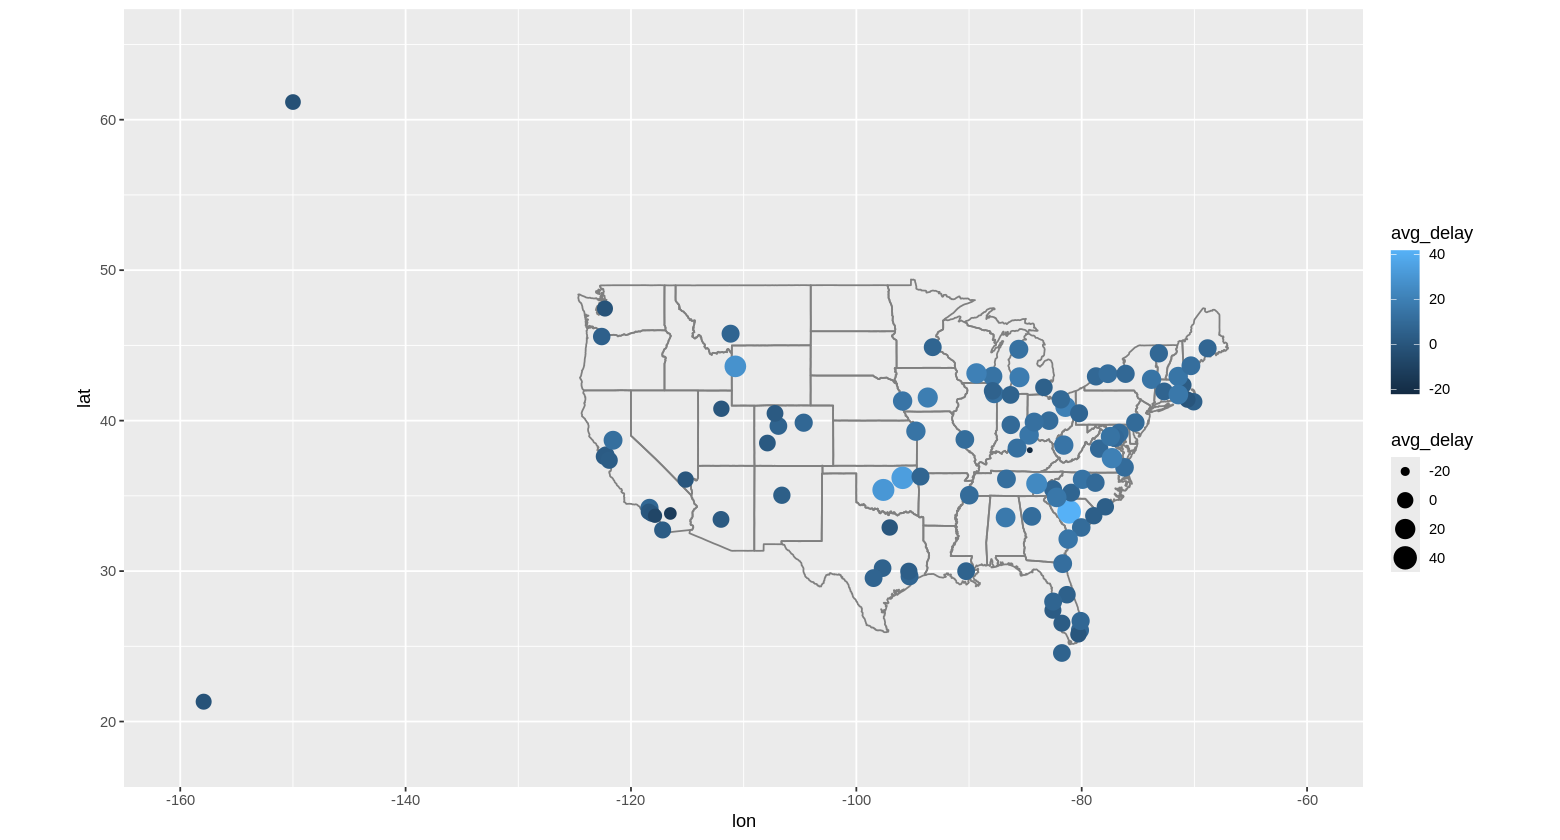

In [30]:
flights3 = flights |>
    group_by(dest) |>
    summarize(avg_delay = mean(arr_delay, na.rm = TRUE))

options(repr.plot.width = 13, repr.plot.height = 7)
airports |>
  left_join(flights3, join_by(faa == dest)) |>
  ggplot(aes(x = lon, y = lat)) +
    borders("state") +
    geom_point(aes(size = avg_delay, color = avg_delay)) +
    coord_quickmap() +
    xlim(-160, -60) +
    ylim(18, 65)

8. What happened on June 13 2013? Draw a map of the delays, and then use Google to cross-reference with the weather.

There was severe weather across the southeast of the US.

Warning message:
“Removed 95 rows containing missing values or values outside the scale range
(`geom_point()`).”


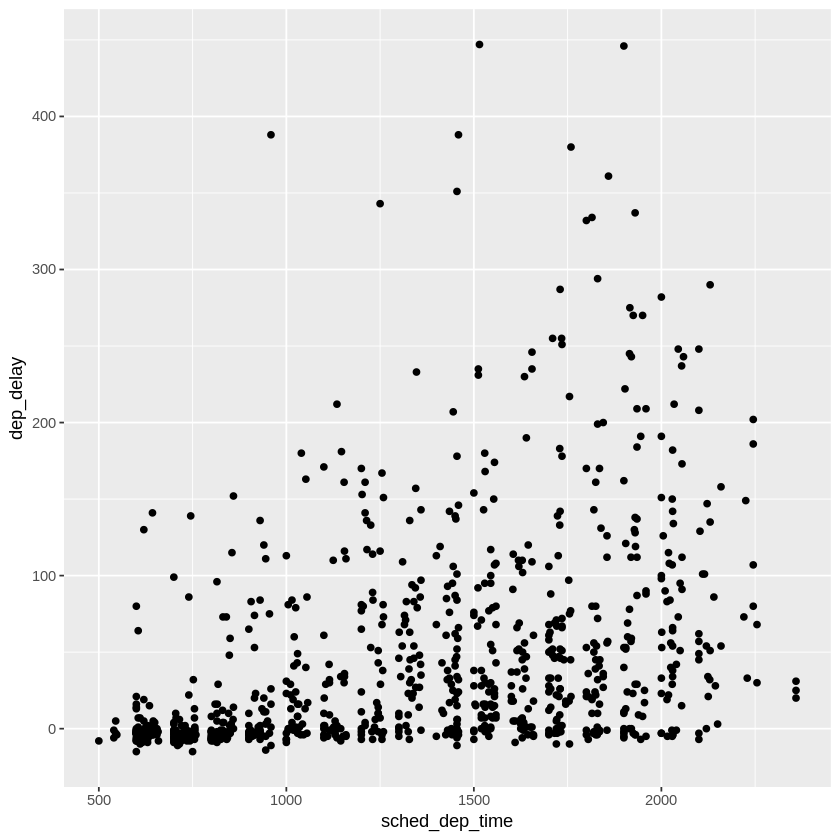

In [53]:
flights |>
    filter(year == 2013, month == 6, day == 13) |>
    ggplot(aes(x = sched_dep_time, y = dep_delay)) +
    geom_point()

## [19.5.5 Exercises](https://r4ds.hadley.nz/joins#exercises-2)

1. Can you explain what’s happening with the keys in this equi join? Why are they different?
```r
x |> full_join(y, join_by(key == key))
#> # A tibble: 4 × 3
#>     key val_x val_y
#>   <dbl> <chr> <chr>
#> 1     1 x1    y1   
#> 2     2 x2    y2   
#> 3     3 x3    <NA> 
#> 4     4 <NA>  y3

x |> full_join(y, join_by(key == key), keep = TRUE)
#> # A tibble: 4 × 4
#>   key.x val_x key.y val_y
#>   <dbl> <chr> <dbl> <chr>
#> 1     1 x1        1 y1   
#> 2     2 x2        2 y2   
#> 3     3 x3       NA <NA> 
#> 4    NA <NA>      4 y3
```

Since it is an equi join, the first join removes one of the key columns by combining them. The second leaves them separate by using keep = TRUE, creating two key columns.

2. When finding if any party period overlapped with another party period we used q < q in the join_by()? Why? What happens if you remove this inequality?

You just want to check the combinations of different quarters rather than checking a quarter against itself. If you remove the inequality you get each quarter overlapping with itself as weel as the one actual error twice (q2,q3 and q3,q2).